In [42]:
from mplsoccer import Pitch,VerticalPitch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [43]:
data = pd.read_csv('30min.csv')


In [44]:
data
data['X'] = data['X']*1.2
data['Y'] = data['Y']*.8
data['X2'] = data['X2']*1.2
data['Y2'] = data['Y2']*.8

In [45]:
dataHome = data[data['Team'] == 'Home' ]
dataAway = data[data['Team'] == 'Away' ]

In [46]:
dataHome

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,Aris,Pass,16,34,33.6,6.4,40.8,3.2
3,Home,Aris,getball,16,34,27.6,19.2,0.0,0.0
4,Home,Aris,Cross,16,34,38.4,19.2,85.2,4.0
5,Home,Eliandro,Pass,16,34,88.8,11.2,73.2,10.4
6,Home,Chaiyawat,Pass,16,34,73.2,10.4,74.4,26.4
...,...,...,...,...,...,...,...,...,...
108,Home,Chayawat,getball,29,38,33.6,51.2,0.0,0.0
109,Home,Chayawat,Cross,29,38,32.4,52.0,81.6,70.4
110,Home,Nopphon,Through,29,38,90.0,60.0,106.8,28.8
112,Home,Jaroensak,corner,30,34,120.0,0.0,114.0,35.2


In [47]:
dataHomeShot = dataHome[(dataHome['Event'] == 'ShotOnTarget') |  (dataHome['Event'] == 'ShotOffTarget') |
                         (dataHome['Event'] == 'ShotGetGoal') | (dataHome['Event'] == 'ShotBlock')]

In [48]:
 dataHomeShot

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
17,Home,Aris,ShotGetGoal,17,18,112.8,43.2,0.0,0.0
33,Home,Chayawat,ShotOnTarget,21,32,103.2,28.0,0.0,0.0
36,Home,Chayawat,ShotBlock,21,32,110.4,39.2,0.0,0.0
113,Home,Saksit,ShotOffTarget,30,34,114.0,35.2,0.0,0.0


In [49]:
dataAwayShot = dataAway[(dataAway['Event'] == 'ShotOnTarget') |  (dataAway['Event'] == 'ShotOffTarget') |
                        (dataAway['Event'] == 'ShotGetGoal') | (dataAway['Event'] == 'ShotBlock')]

In [50]:
dataAwayShot

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
83,Away,Siwakorn,ShotOffTarget,27,4,20.4,38.4,0.0,0.0


In [51]:
dataHomePass = dataHome[(dataHome['Event'] == 'Pass') |  (dataHome['Event'] == 'Through') |
                         (dataHome['Event'] == 'go') | (dataHome['Event'] == 'Cross')]
dataHomePass = dataHomePass.reset_index()
dataHomePass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,0,Home,Aris,Pass,16,34,33.6,6.4,40.8,3.2
1,4,Home,Aris,Cross,16,34,38.4,19.2,85.2,4.0
2,5,Home,Eliandro,Pass,16,34,88.8,11.2,73.2,10.4
3,6,Home,Chaiyawat,Pass,16,34,73.2,10.4,74.4,26.4
4,7,Home,Nopphon,Pass,16,34,76.8,23.2,74.4,11.2
5,8,Home,Chaiyawat,Pass,16,34,73.2,12.8,54.0,24.0
6,9,Home,Aris,Pass,16,34,54.0,24.0,54.0,52.8
7,10,Home,Saksit,Pass,16,34,62.4,52.0,64.8,56.0
8,11,Home,Nopphon,Pass,17,18,76.8,60.8,81.6,60.0
9,12,Home,Jaroensak,Cross,17,18,82.8,60.0,111.6,56.8


In [52]:
dataAwayPass = dataAway[(dataAway['Event'] == 'Pass') |  (dataAway['Event'] == 'Through') |
                         (dataAway['Event'] == 'go') | (dataAway['Event'] == 'Cross')]
dataAwayPass = dataAwayPass.reset_index()
dataAwayPass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,2,Away,Siwakorn,Pass,16,34,36.0,2.4,40.8,11.2
1,18,Away,Pakorn,Cross,18,24,66.0,17.6,32.4,30.4
2,40,Away,Go,Pass,21,32,91.2,48.8,76.8,50.4
3,57,Away,Elias,Pass,24,40,92.4,20.8,86.4,11.2
4,58,Away,Philip,Pass,24,40,67.2,12.8,64.8,20.8
5,59,Away,Siwakorn,Pass,24,40,64.8,19.2,76.8,39.2
6,60,Away,Rochela,Pass,24,40,76.8,44.0,70.8,65.6
7,61,Away,Jaturapat,Pass,24,40,67.2,68.8,51.6,76.0
8,62,Away,Bordin,Pass,25,46,52.8,75.2,63.6,72.0
9,63,Away,Jaturapat,Pass,25,46,63.6,71.2,66.0,51.2


In [53]:
dataAwayDef= dataAway[(dataAway['Event'] == 'clear') |  (dataAway['Event'] == 'intercept') |
                         (dataAway['Event'] == 'getball') | (dataAway['Event'] == 'block')|
                      (dataAway['Event'] == 'yellow')| (dataAway['Event'] == 'foul')]
dataAwayDef = dataAwayDef.reset_index()
dataAwayDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,1,Away,Siwakorn,getball,16,34,42.0,3.2,0.0,0.0
1,13,Away,Rochela,clear,17,18,115.2,55.2,0.0,0.0
2,22,Away,Go,clear,18,24,111.6,46.4,0.0,0.0
3,37,Away,Siwakorn,block,21,32,111.6,40.0,0.0,0.0
4,38,Away,Siwakorn,clear,21,32,111.6,40.0,0.0,0.0
5,48,Away,Pakorn,intercept,21,32,91.2,16.0,0.0,0.0
6,49,Away,Philip,yellow,21,32,100.8,8.0,0.0,0.0
7,51,Away,Rochela,clear,22,16,117.6,54.4,0.0,0.0
8,53,Away,Philip,clear,23,12,116.4,35.2,0.0,0.0
9,55,Away,Elias,clear,24,40,115.2,47.2,0.0,0.0


In [54]:
dataHomeDef= dataHome[(dataHome['Event'] == 'clear') |  (dataHome['Event'] == 'intercept') |
                         (dataHome['Event'] == 'getball') | (dataHome['Event'] == 'block')|
                      (dataHome['Event'] == 'yellow')| (dataHome['Event'] == 'foul')]
dataHomeDef = dataHomeDef.reset_index()
dataHomeDef

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,3,Home,Aris,getball,16,34,27.6,19.2,0.0,0.0
1,41,Home,Nopphon,intercept,21,32,78.0,48.8,0.0,0.0
2,56,Home,Daisuke,foul,24,40,106.8,56.0,0.0,0.0
3,69,Home,Yuto,intercept,25,46,48.0,44.8,0.0,0.0
4,78,Home,Daisuke,clear,27,4,9.6,8.8,0.0,0.0
5,80,Home,Aris,clear,27,4,3.6,23.2,0.0,0.0
6,82,Home,Suphanan,intercept,27,4,8.4,44.8,0.0,0.0
7,100,Home,Saksit,clear,29,38,26.4,52.8,0.0,0.0
8,105,Home,Saksit,intercept,29,38,18.0,58.4,0.0,0.0
9,108,Home,Chayawat,getball,29,38,33.6,51.2,0.0,0.0


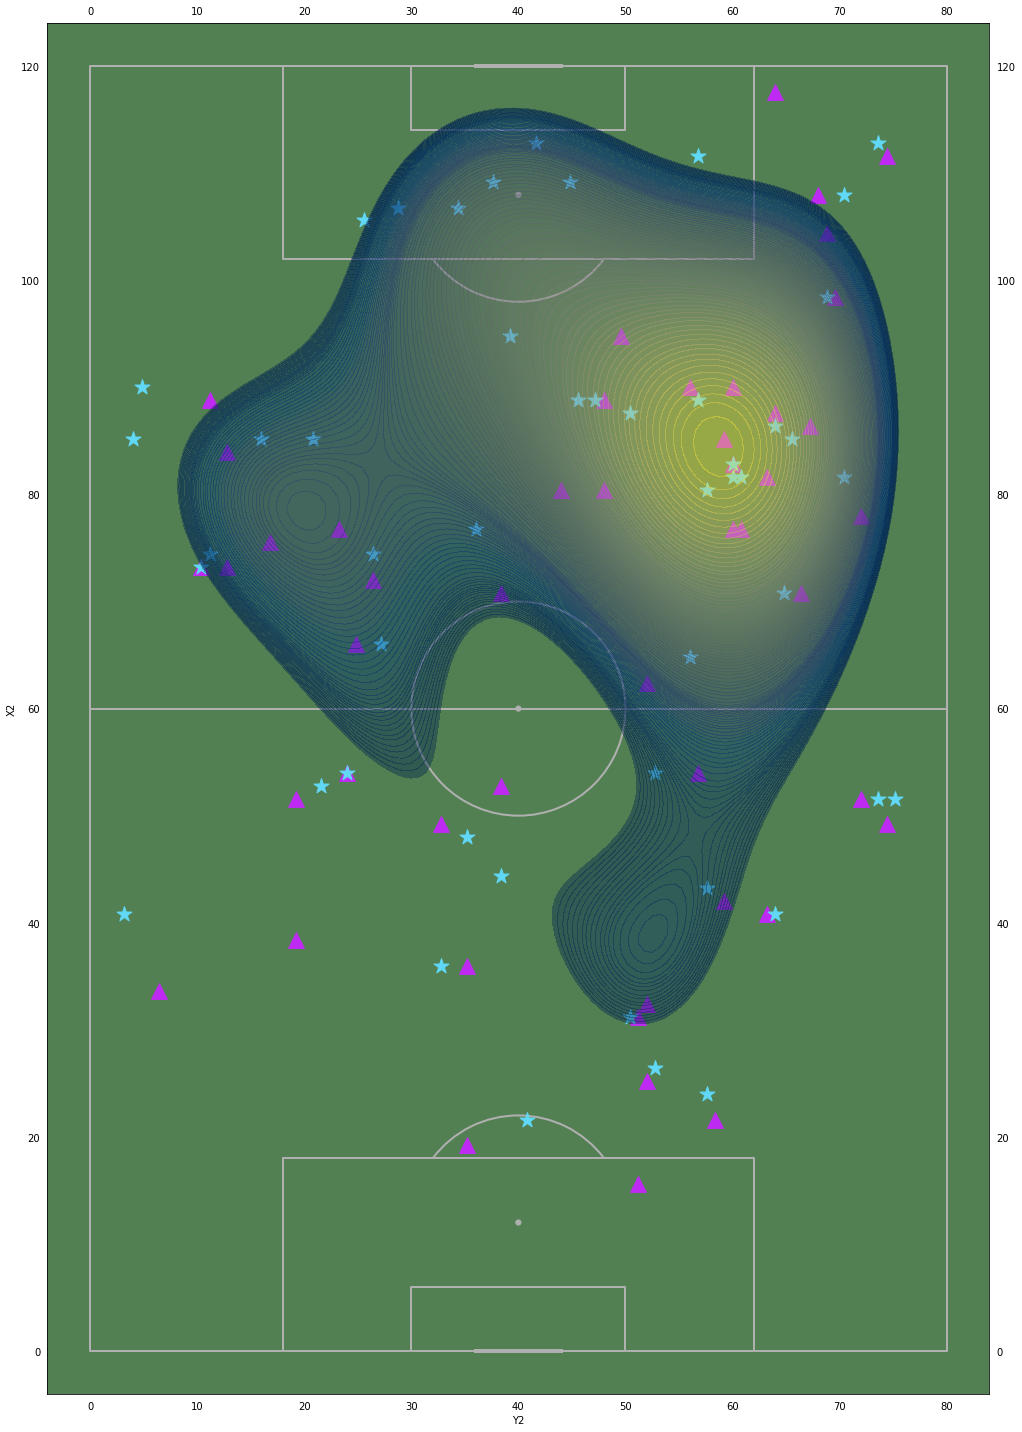

In [63]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#BE2AF3',s = 250,marker = "^")
plt.scatter(dataHomePass['Y2'],dataHomePass['X2'],c='#60D8F6',s = 250 ,marker = '*')

kde = sns.kdeplot(x = dataHomePass['Y2'], y = dataHomePass['X2'],
                  fill = True,shade_lowest= False,common_grid= False,
                  alpha=.4,thresh=.5,n_levels=100,cmap = 'cividis')


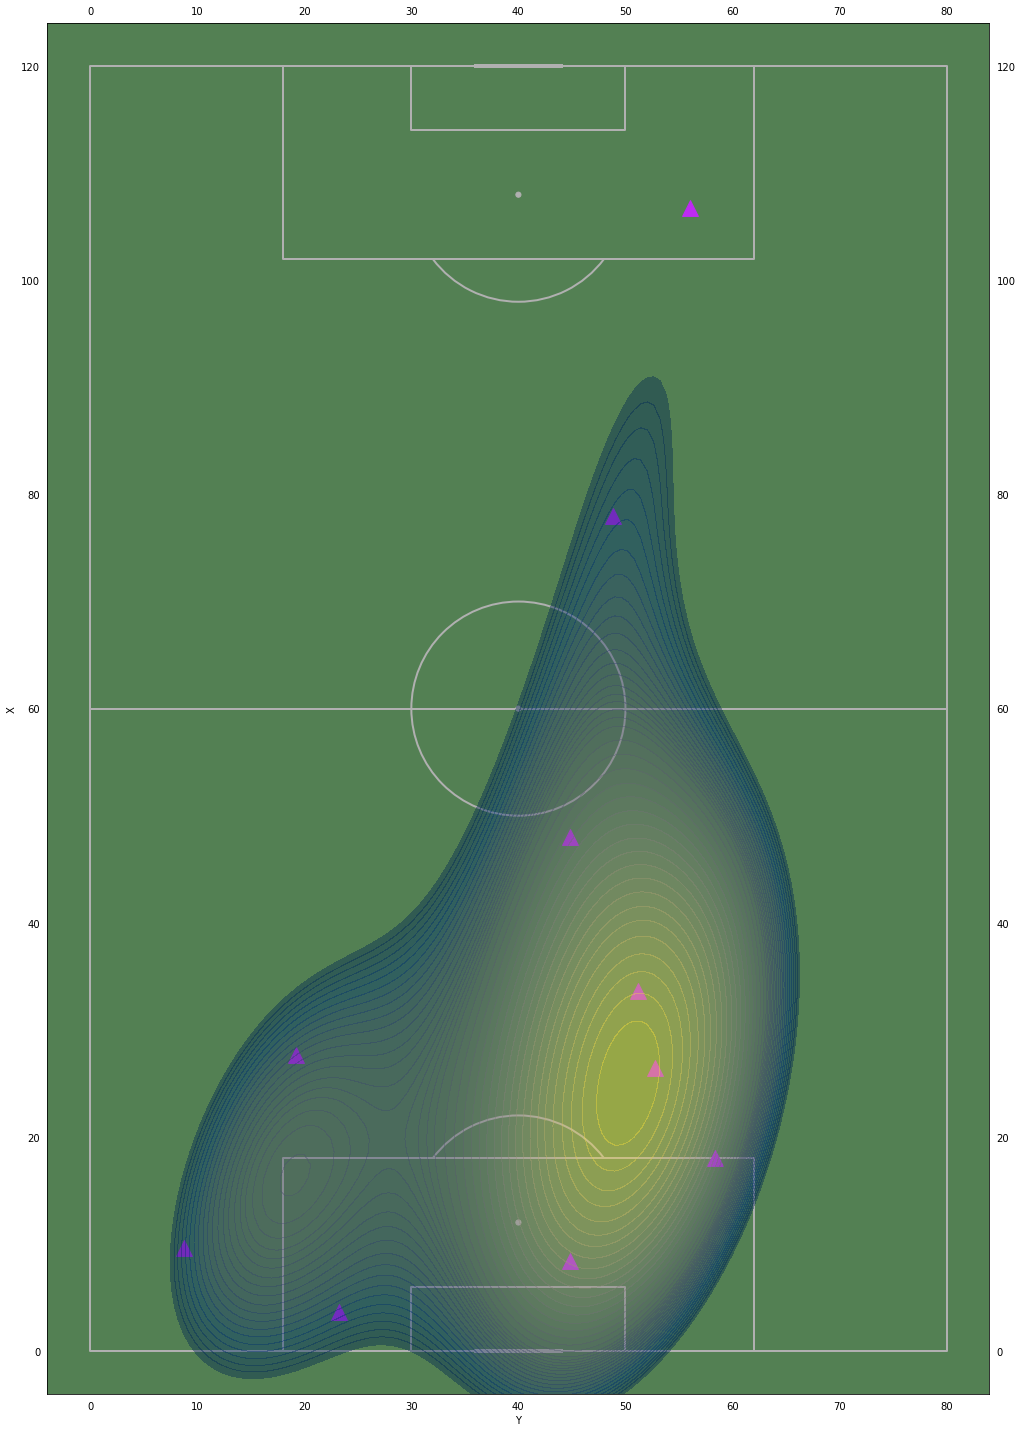

In [65]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataHomeDef['Y'],dataHomeDef['X'],c='#BE2AF3',s = 250,marker = "^")

kde = sns.kdeplot(x = dataHomeDef['Y'], y = dataHomeDef['X'],
                  fill = True,shade_lowest= False,common_grid= False,
                  alpha=.4,thresh=.5,n_levels=40,cmap = 'cividis')

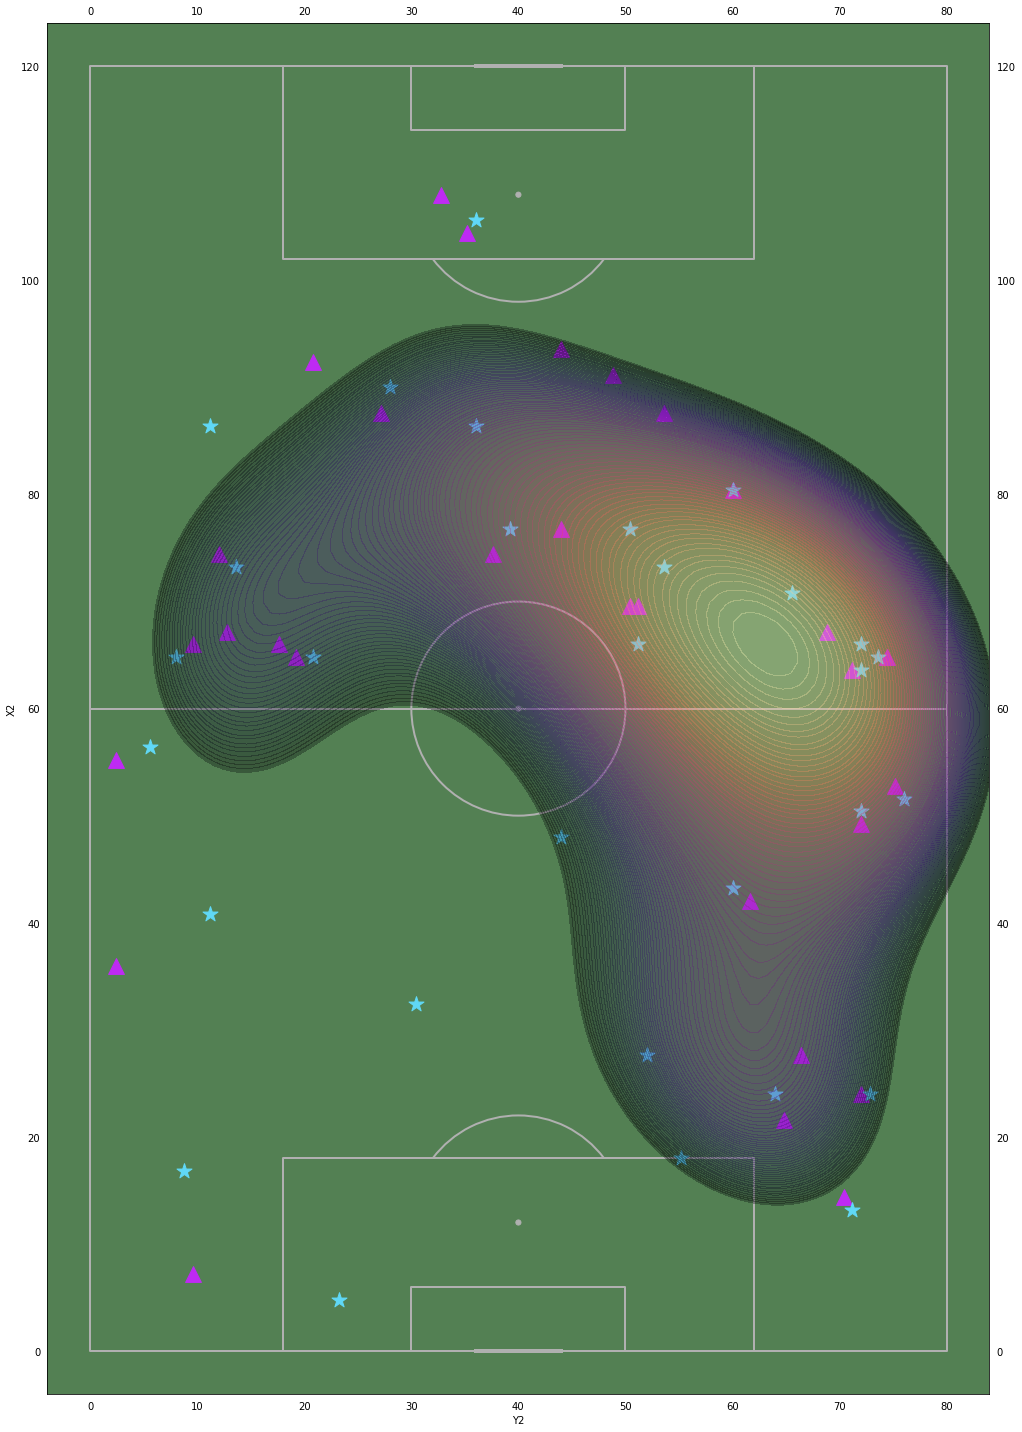

In [64]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#BE2AF3',s = 250,marker = "^")
plt.scatter(dataAwayPass['Y2'],dataAwayPass['X2'],c='#60D8F6',s = 250 ,marker = '*')

kde = sns.kdeplot(x = dataAwayPass['Y2'], y = dataAwayPass['X2'],
                  fill = True,shade_lowest=False,common_grid=False,
                  alpha=.3,thresh=.5,n_levels=100,cmap = 'magma')


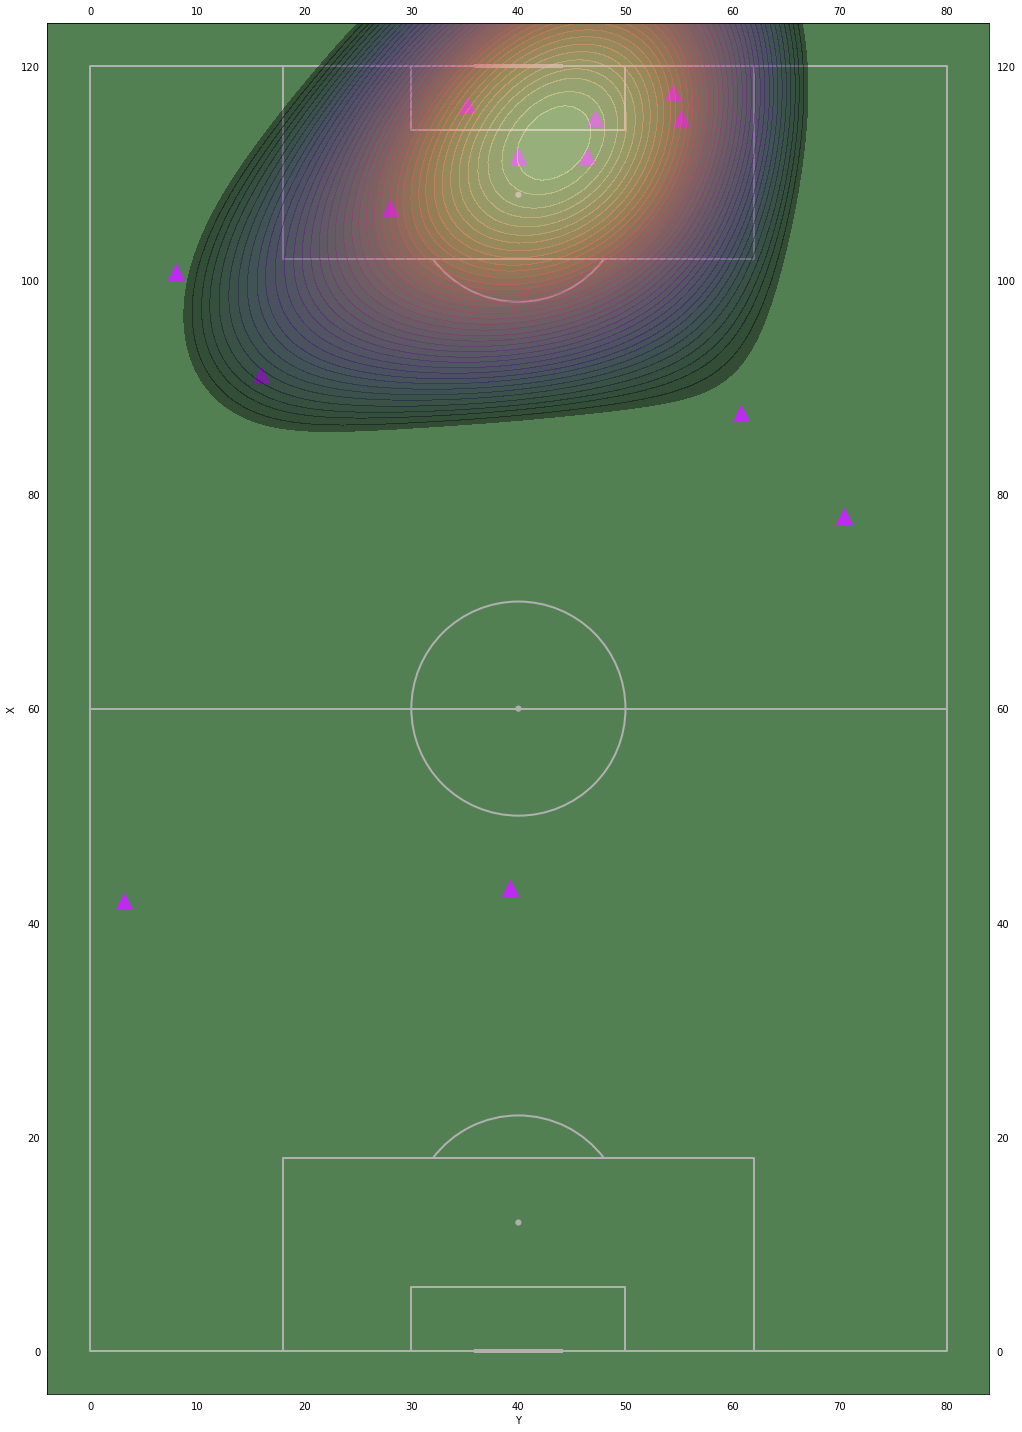

In [66]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#BE2AF3',s = 250,marker = "^")

kde = sns.kdeplot(x = dataAwayDef['Y'], y = dataAwayDef['X'],
                  fill = True,shade_lowest= False,common_grid= True,
                  alpha=.4,thresh=.5,n_levels=40,cmap = 'magma')

In [58]:
pDrtxA = dataAwayPass['X']
pDrtyA = dataAwayPass['Y']
pDesxA = dataAwayPass['X2']
pDesyA = dataAwayPass['Y2']
pStyA = dataAwayPass['Event']

In [59]:
pDrtxH = dataHomePass['X']
pDrtyH = dataHomePass['Y']
pDesxH = dataHomePass['X2']
pDesyH = dataHomePass['Y2']
pStyH = dataHomePass['Event']

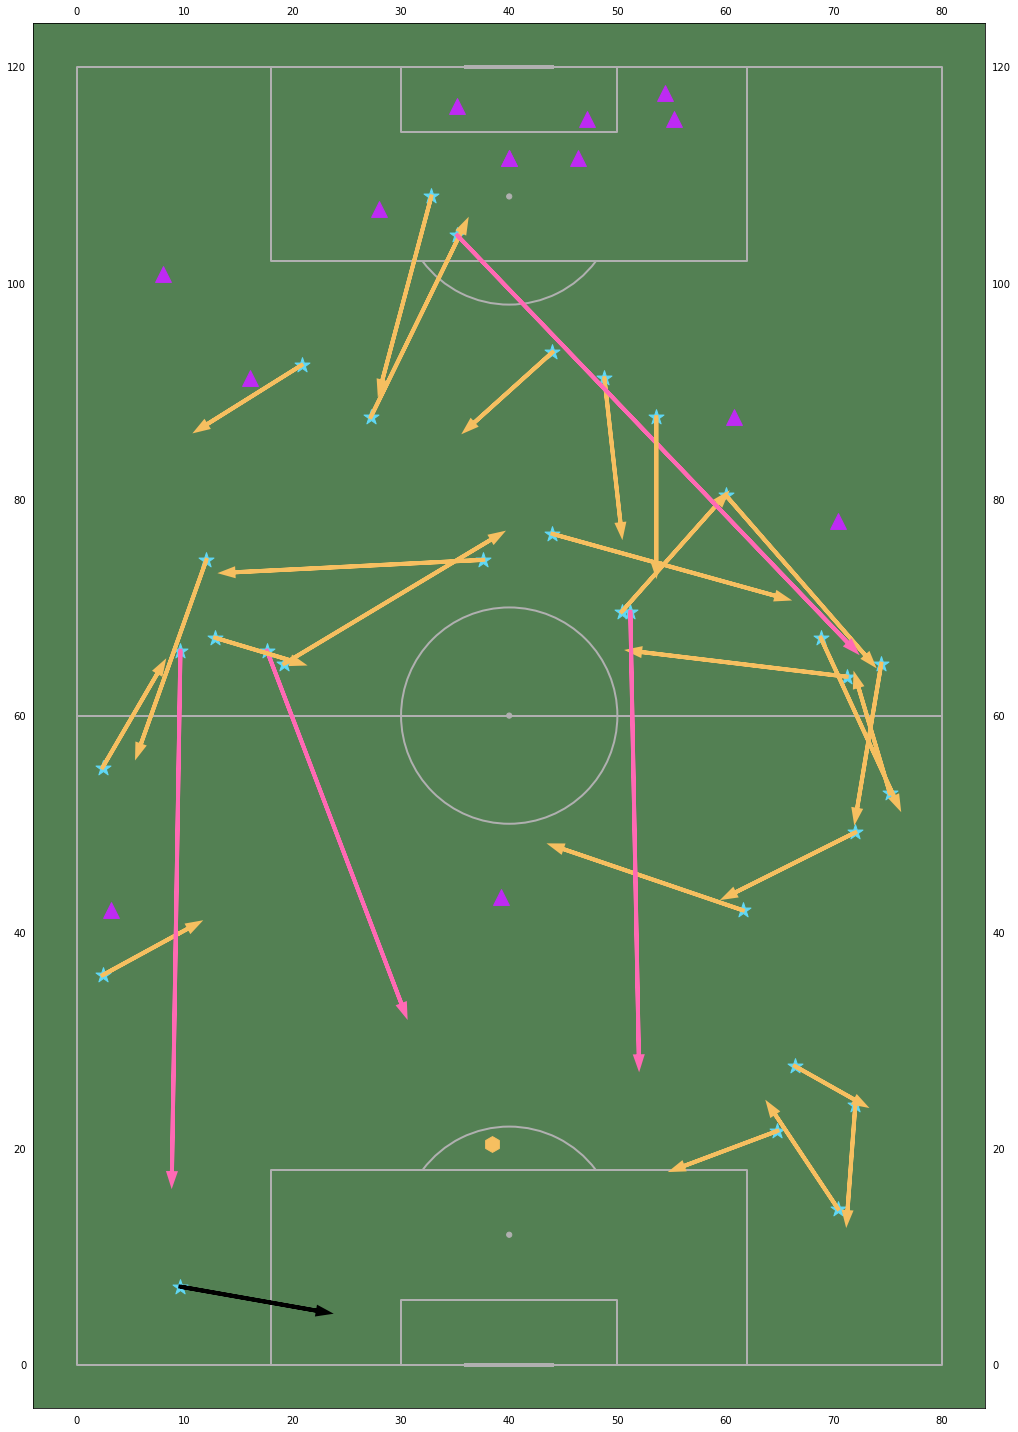

In [60]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))
    
plt.scatter(dataAwayDef['Y'],dataAwayDef['X'],c='#BE2AF3',s = 250,marker = "^")

plt.scatter(dataAwayPass['Y'],dataAwayPass['X'],c='#60D8F6',s = 250 ,marker = '*')

plt.scatter(dataAwayShot['Y'],dataAwayShot['X'],c='#F6BF60',s = 250,marker = "h")
for i in range(len(pStyA)):
    if(pStyA[i] == 'Cross'):
        plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i], color = '#FF69B4',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyA[i] == 'Through'):
        plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i], color = '#000000',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyA[i] == 'Pass'):
         plt.arrow(pDrtyA[i],pDrtxA[i],pDesyA[i]-pDrtyA[i],pDesxA[i]-pDrtxA[i],color ='#F6BF60',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')


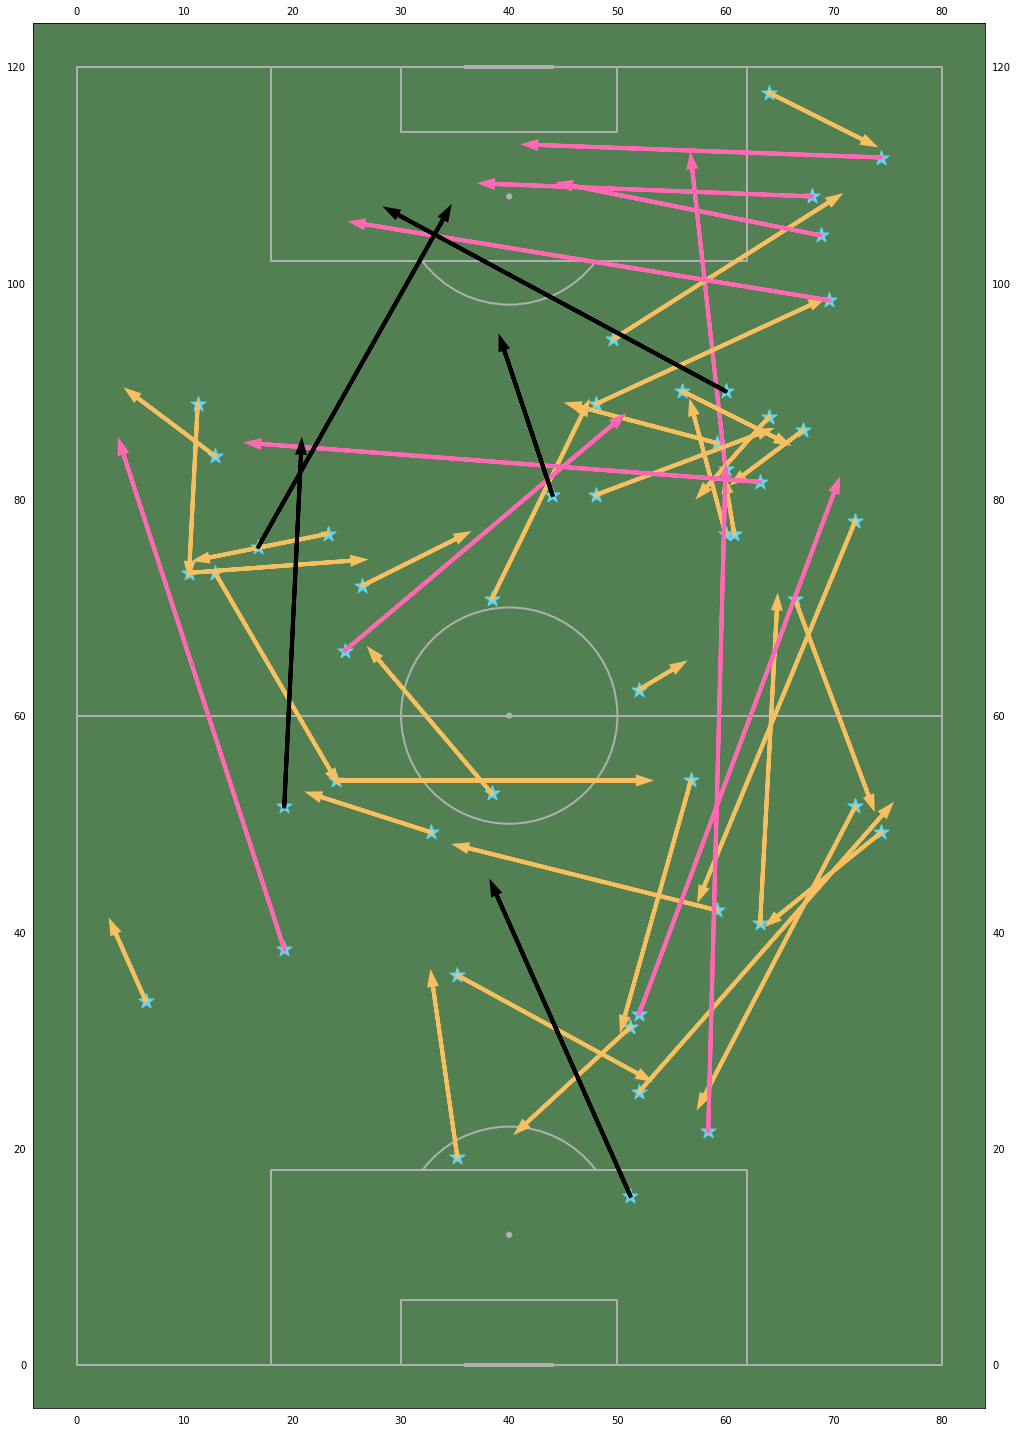

In [61]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,
              axis=True, label=True,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataHomePass['Y'],dataHomePass['X'],c='#60D8F6',s = 250 ,marker = '*')

for i in range(len(pStyH)):
    if(pStyH[i] == 'Cross'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#FF69B4',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Through'):
        plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i], color = '#000000',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
    if(pStyH[i] == 'Pass'):
         plt.arrow(pDrtyH[i],pDrtxH[i],pDesyH[i]-pDrtyH[i],pDesxH[i]-pDrtxH[i],color ='#F6BF60',linewidth =4,head_width = 0.6 ,
                  length_includes_head = 'True')
